# Reading data from CSV file and filtering Apple stock price 

In [21]:
import pandas as pd
import numpy as np
allData = pd.read_csv('Data//all_stocks_5yr.csv', index_col=['date'], parse_dates=['date'])
df = allData[allData['Name'] == 'AAPL']
del df['open']
del df['high']
del df['low']
del df['volume']
del df['Name']

# Simple Moving Average (SMA)

In [2]:
def simple_moving_average(series, n = 3) :
    cumsum, moving_aves = [0], []
    for i, x in enumerate(series, 1):
        cumsum.append(cumsum[i-1] + x)
        if i >= n:
            moving_ave = (cumsum[i] - cumsum[i-n]) / n
        else:
            moving_ave = None #seri[i-1]
        moving_aves.append(moving_ave)
        
    return moving_aves

In [43]:
pd.options.mode.chained_assignment = None  # default='warn'
df['sma15'] = simple_moving_average(df['close'], 15)

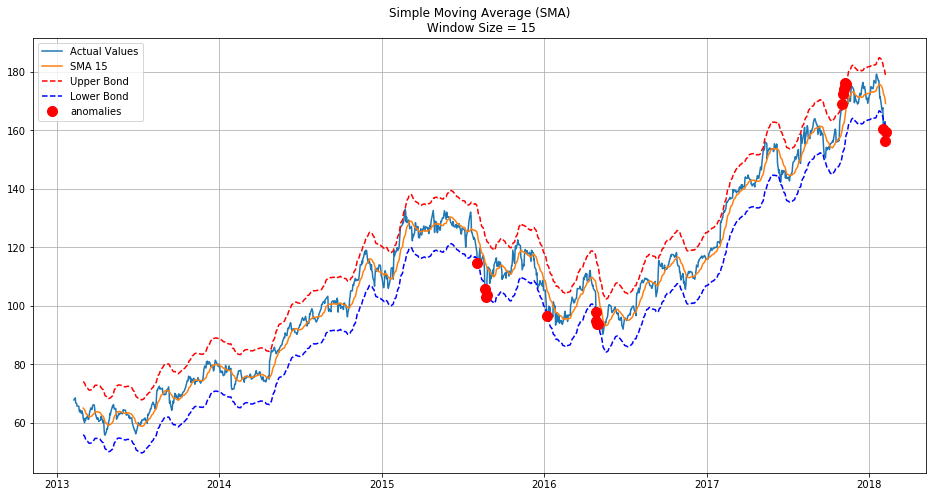

In [51]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
#from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

window = 15
scale = 1.96

plt.figure(figsize=(16,8))
plt.title("Simple Moving Average (SMA)\n Window Size = {}".format(window))
#plt.plot(rolling_mean, "g", label="SMA")

plt.plot(df['close'], label="Actual Values")
plt.plot(df['sma15'], label="SMA 15")


rolling_mean = df['sma15']
series = df['close']
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
lower_bond = rolling_mean - (mae + scale * deviation)
upper_bond = rolling_mean + (mae + scale * deviation)
plt.plot(upper_bond, "r--", label="Upper Bond")
plt.plot(lower_bond, "b--",  label="Lower Bond")
        
df['anomalies'] = float('NaN')
df['anomalies'][series < lower_bond] = series[series < lower_bond]
df['anomalies'][series > upper_bond] = series[series > upper_bond]
plt.plot(df['anomalies'], "ro", markersize = 10)

plt.legend(loc="upper left")    
plt.grid(True)
plt.show()